<h2>Logistic Regression</h2>

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("Social_Network_Ads.csv")

In [68]:
df.shape

(400, 5)

In [69]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [70]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [71]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

__Performing Regression__

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [84]:
#Splitting info features and target
X = df.drop(columns=['User ID','Gender','Purchased'])
Y = df['Purchased']

In [85]:
#Splitting into training and testing model
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


In [86]:
#logistic regression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

#predictic the values
Y_pred = logmodel.predict(X_test)

In [87]:
#printning the score
logmodel.score(X_test,Y_test)

0.88

In [88]:
#print the confusion matrix
conf = confusion_matrix(Y_test,Y_pred)
print(conf)

[[61  2]
 [10 27]]


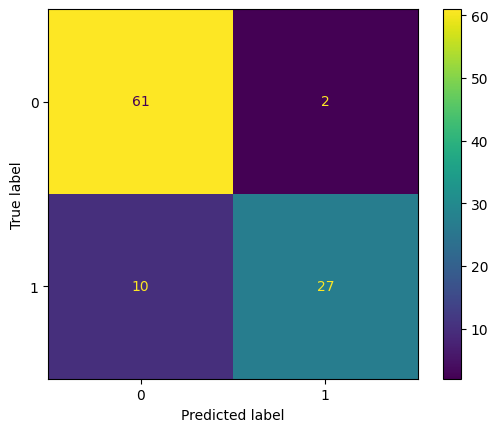

In [89]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()
plt.show()

In [90]:
#printing the values of TP,FP,FN,TN

def get_values(Y_test,Y_pred):
    cm = confusion_matrix(Y_test,Y_pred)
    return (cm[0][0],cm[0][1],cm[1][0],cm[1][1])

TP,FP,FN,TN = get_values(Y_test,Y_pred)

print("TP :",TP)
print("FP :",FP)
print("FN :",FN)
print("TN :",TN)

TP : 61
FP : 2
FN : 10
TN : 27


In [91]:
#print the accuracy,precision,recall
print("Accuracy: ",(TP+TN)/(TP+TN+FP+FN))
print("Precision :",TP/(TP+FP))
print("Recall :",TP/(TP+FN))

Accuracy:  0.88
Precision : 0.9682539682539683
Recall : 0.8591549295774648


In [96]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


<Axes: >

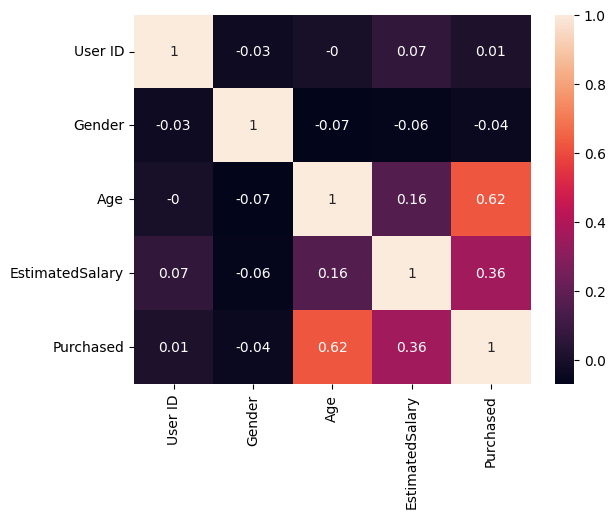

In [98]:
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

In [99]:
df.dtypes

User ID            int64
Gender             int32
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object